# Simple MNIST convnet

**Author:** [fchollet](https://twitter.com/fchollet)<br>
**Date created:** 2015/06/19<br>
**Last modified:** 2020/04/21<br>
**Description:** A simple convnet that achieves ~99% test accuracy on MNIST.

## Setup

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

## Prepare the data

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11501568/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Build the model

In [3]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), strides = (1, 1), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dropout (Dropout)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
____________________________________________________

## Train the model

In [6]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 13s 9ms/step - loss: 0.4302 - accuracy: 0.8802 - val_loss: 0.1570 - val_accuracy: 0.9573
Epoch 2/15
422/422 [==============================] - 3s 7ms/step - loss: 0.1836 - accuracy: 0.9464 - val_loss: 0.1027 - val_accuracy: 0.9738
Epoch 3/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1380 - accuracy: 0.9588 - val_loss: 0.0812 - val_accuracy: 0.9803
Epoch 4/15
422/422 [==============================] - 4s 8ms/step - loss: 0.1170 - accuracy: 0.9648 - val_loss: 0.0726 - val_accuracy: 0.9808
Epoch 5/15
422/422 [==============================] - 3s 8ms/step - loss: 0.1030 - accuracy: 0.9688 - val_loss: 0.0666 - val_accuracy: 0.9827
Epoch 6/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0929 - accuracy: 0.9713 - val_loss: 0.0591 - val_accuracy: 0.9855
Epoch 7/15
422/422 [==============================] - 3s 7ms/step - loss: 0.0879 - accuracy: 0.9729 - val_loss: 0.0578 - val_accuracy: 0.9862
Epoch

# Save weights and biases & intermediate layer output value

*   weights are saved in order to reproduce the network behaviour

*   intermediate layer output value is saved in order to test the c implementation ( step by step )



In [11]:
# MODEL LAYERS: 
model.layers

In [40]:
weights_conv = model.layers[4].get_weights()[0]
np.savetxt('weights_conv.txt', weights_conv, delimiter = ',')
print("weights_conv.shape: ",weights_conv.shape)

bias_conv = model.layers[4].get_weights()[1]
np.savetxt('bias_conv.txt', bias_conv, delimiter = ',')
print("bias_conv.shape: ",bias_conv.shape)

weights_dense = model.layers[4].get_weights()[0]
np.savetxt('weights_dense.txt', weights_dense, delimiter = ',')
print("weights_dense.shape: ",weights_dense.shape)

bias_dense = model.layers[4].get_weights()[1]
np.savetxt('bias_dense.txt', bias_dense, delimiter = ',')
print("bias_dense.shape: ",bias_dense.shape)


weights_conv.shape:  (5408, 10)
bias_conv.shape:  (10,)
weights_dense.shape:  (5408, 10)
bias_dense.shape:  (10,)


In [59]:
# INTERMEDIATE LAYER OUTPUT

extractor = keras.Model(inputs=model.inputs,
                        outputs=[layer.output for layer in model.layers])
input = x_train[0:1]
features = extractor(input)

# save intermediate layers
for layer_data, layer in zip(features, model.layers):
  print(layer.name," ",layer_data.shape)
  reshaped_array = np.reshape(layer_data.numpy(), [1,-1], order="C")
  np.savetxt(layer.name+'_out.txt', reshaped_array, delimiter = ',')


conv2d   (1, 26, 26, 32)
max_pooling2d   (1, 13, 13, 32)
flatten   (1, 5408)
dropout   (1, 5408)
dense   (1, 10)


## Evaluate the trained model

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.05331087484955788
Test accuracy: 0.983299970626831


In [ ]:
index = 21
out = model.predict(x_test[index:index + 1])
np.argmax(out)


6

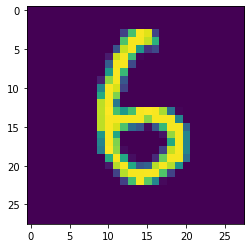

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_test[index][:,:,0])

In [ ]:
import time
start = time.time()
for _ in range(100): 
  out = model.predict(x_test[index:index + 1])
end = time.time()
print((end - start)/100)


0.052080268859863284
